In [1]:
import torch
import torchvision.utils
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

import importlib
import scripts as s

# In an environment with TensorFlow installed, e.g. Google Colab, uncomment the following code:

# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

In [20]:
importlib.reload(s)

<module 'scripts' from 'C:\\Users\\Alfred\\Documents\\learn_pytorch\\scripts.py'>

In [3]:
classes = ["T-shirt/top",
           "Trouser",
           "Pullover",
           "Dress",
           "Coat",
           "Sandal",
           "Shirt",
           "Sneaker",
           "Bag",
           "Ankle book"]

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

writer = SummaryWriter("runs/fashion_mnist_experiment")

Using cuda device


# Hyperparameters

In [47]:
model = s.NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [48]:
batch_size = 128

In [49]:
epochs = 5

In [58]:
learning_rate = 0.001

In [50]:
loss_fn = nn.CrossEntropyLoss()

In [57]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Data

In [9]:
training_data = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=ToTensor())

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

In [10]:
training_data[0][0].shape, training_data

(torch.Size([1, 28, 28]),
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

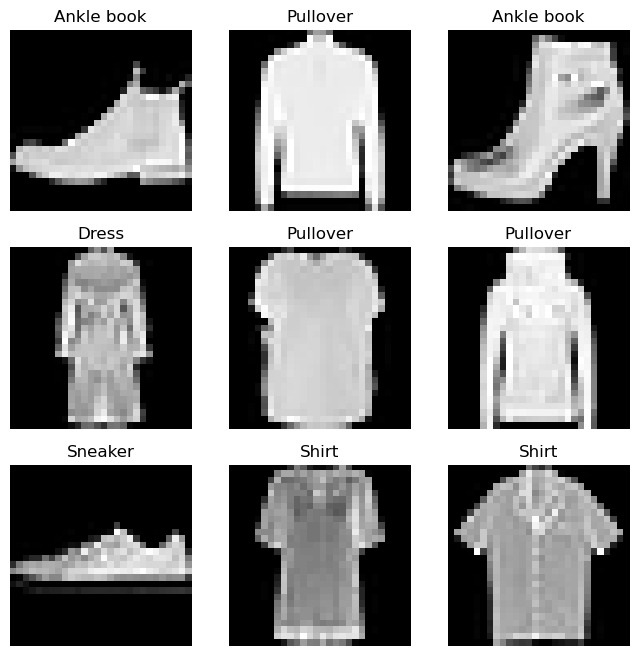

In [11]:
s.peek_dataset(training_data, classes, 3, 3)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

first_batch_images, first_batch_labels = next(iter(train_dataloader))
print(f"Shape of first batch of images: {first_batch_images.shape}")
print(f"Shape of first batch of labels: {first_batch_labels.shape}")

plt.imshow(first_batch_images[0].squeeze(), cmap="gray")
plt.title(classes[first_batch_labels[0]])
plt.show()

# Training

In [ ]:
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------------")
    s.train(train_dataloader, model, loss_fn, optimizer, device)
    s.test(test_dataloader, model, loss_fn, device)

print("Done!")

In [59]:
for t in range(epochs):
    s.train_with_validation(train_dataloader, 
                            test_dataloader, 
                            model, 
                            loss_fn, optimizer, device,
                            writer, 100, t, f"batch size = {batch_size} epoch = {epochs} learning rate = {learning_rate} trial = 7")

print("Done!")

Done!


In [60]:
s.test(test_dataloader, model, loss_fn, device)

(0.7537729528885854, 0.7118)

# Save and Load

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

In [ ]:
model_loaded = s.NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

In [ ]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')